# Chapter 1 Introduction to Graph Learning

Main topics: 
1. Why graphs?
2. Why graph learning?
3. Why graph neural networks?





# Chapter 2: Graph Theory for GNNs

Source Code: https://github.com/PacktPublishing/Hands-On-Graph-Neural-Networks-Using-Python/tree/main/Chapter02

In [2]:
# Creating a simple graph with networkX
import numpy as np
import networkx as nx
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A','C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

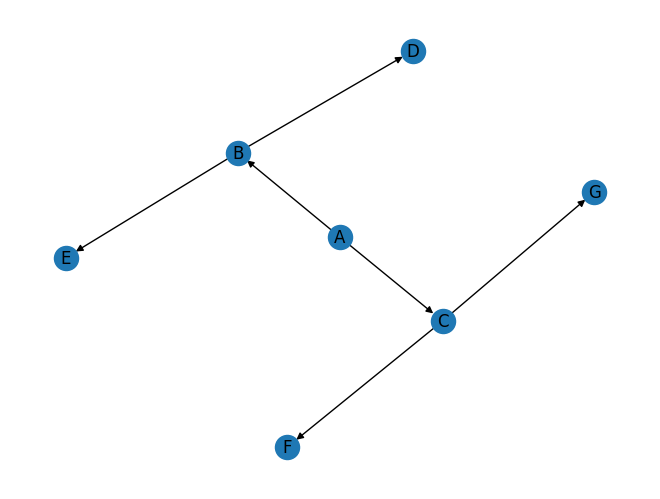

In [3]:
# Create a digraph 
import matplotlib
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
('B', 'E'), ('C', 'F'), ('C', 'G')])
# nx.draw(DG)
nx.draw(DG, with_labels=True)

{('A', 'B'): Text(0.2846756327363887, 0.0648000770226914, '10'),
 ('A', 'C'): Text(-0.37737832797833903, -0.0756323577811298, '20'),
 ('B', 'D'): Text(0.8334491717428636, 0.044174244720620356, '30'),
 ('B', 'E'): Text(0.7562410831031599, 0.29147188188620293, '40'),
 ('C', 'F'): Text(-0.8042972848896459, -0.05681220937597999, '50'),
 ('C', 'G'): Text(-0.7317750481789026, -0.2679506544726505, '60')}

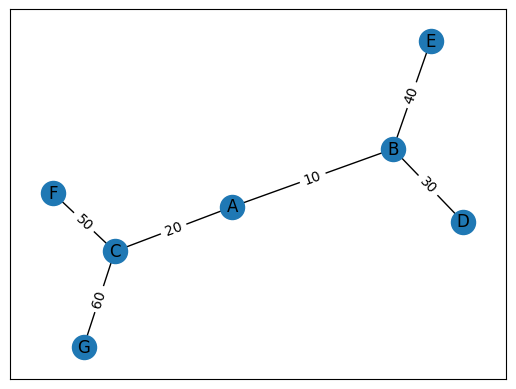

In [4]:
# Create a weighted graph
WG = nx.Graph()
WG.add_edges_from(
    [('A', 'B', {"weight": 10}), 
     ('A', 'C', {"weight": 20}), 
     ('B', 'D', {"weight": 30}), 
     ('B', 'E', {"weight": 40}), 
     ('C', 'F', {"weight": 50}), 
     ('C', 'G', {"weight": 60})]
)

# Define spring layout
pos=nx.spring_layout(WG)

# edge weight labels 
edge_labels = nx.get_edge_attributes(WG, 'weights')

# draw nodes
nx.draw_networkx_nodes(WG, pos)
# Draw edges
nx.draw_networkx_edges(WG, pos)
# Draw node labels 
nx.draw_networkx_labels(WG, pos)
# nx.draw(WG, with_labels=True,)
# Get edge weights
edge_labels = nx.get_edge_attributes(WG, "weight")
nx.draw_networkx_edge_labels(WG, pos=pos, edge_labels=edge_labels)

In [5]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 2 connected? True


Page 18 Computing degrees using networkx

In [6]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), 
                  ('A', 'C'), 
                  ('B', 'D'), 
                  ('B', 'E'), 
                  ('C', 'F'), 
                  ('C', 'G')])
print(f"deg(A) = {G.degree['A']}")

DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), 
                   ('A', 'C'), 
                   ('B', 'D'), 
                   ('B', 'E'), 
                   ('C', 'F'), 
                   ('C', 'G')])
print(f"In degree deg^-(A): {DG.in_degree['A']}")
print(f"Out degree deg^+(A): {DG.out_degree['A']}")

deg(A) = 2
In degree deg^-(A): 0
Out degree deg^+(A): 2


Centrality measures: 
1. Degree centrality: Simply defined as the degree of the node. High degree centrality means the node is highly connected and may act as a hub in the graph. 
2. Closeness Centrality: Measures the average length of the shortest path between the target node and all other nodes in the graph. Nodes that can reach all other nodes in the graph in few hops, have high closeness centralities. 
3. Betweenness Centrality: Measures the number of times the target node is found on the shortest path between all pairs of other nodes in the graph. A node with high betweenness centrality acts as a bottleneck or bridge in the the graph. 

In [7]:
# Calculating centrality measures with NetworkX builtins
print(f"Degree Centrality: {nx.degree_centrality(G)}")
print(f"Closeness Centrality: {nx.closeness_centrality(G)}")
print(f"Betweenness Centrality: {nx.betweenness_centrality(G)}")

Degree Centrality: {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness Centrality: {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness Centrality: {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [8]:
print(nx.adjacency_matrix(G).todense())

[[0 1 1 0 0 0 0]
 [1 0 0 1 1 0 0]
 [1 0 0 0 0 1 1]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]


In [9]:
adj_list = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1],
    5: [2],
    6: [2] }

In [10]:
# BFS
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), 
     ('A', 'C'), 
     ('B', 'D'),
     ('B', 'E'), 
     ('C', 'F'), 
     ('C', 'G')])

def bfs(graph:nx.Graph, node):
    visited, queue = [node], [node]
    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited

# Call bfs on our current graph
bfs(G, 'A')
    


['A', 'B', 'C', 'D', 'E', 'F', 'G']

### Depth-First Search

In [11]:
visited = []
def dfs(visited:list, graph:nx.Graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)
    return visited

dfs(visited, G, 'A')

    

['A', 'B', 'D', 'E', 'C', 'F', 'G']

## Chapter 3: Creating Node Representations with DeepWalk


In [12]:
def cosine_similarity(vec_a, vec_b):
    return np.dot(vec_a, vec_b)/(np.linalg.norm(vec_a)*np.linalg.norm(vec_b))

In [13]:
CONTEXT_SIZE = 2
text = """Lorem ipsum dolor sit amet, consectetur
adipiscing elit. Nunc eu sem scelerisque, dictum eros
aliquam, accumsan quam. Pellentesque tempus, lorem ut
semper fermentum, ante turpis accumsan ex, sit amet
ultricies tortor erat quis nulla. Nunc consectetur ligula
sit amet purus porttitor, vel tempus tortor scelerisque.
Vestibulum ante ipsum primis in faucibus orci luctus
et ultrices posuere cubilia curae; Quisque suscipit
ligula nec faucibus accumsan. Duis vulputate massa sit
amet viverra hendrerit. Integer maximus quis sapien id
convallis. Donec elementum placerat ex laoreet gravida.
Praesent quis enim facilisis, bibendum est nec, pharetra
ex. Etiam pharetra congue justo, eget imperdiet diam
varius non. Mauris dolor lectus, interdum in laoreet
quis, faucibus vitae velit. Donec lacinia dui eget
maximus cursus. Class aptent taciti sociosqu ad litora
torquent per conubia nostra, per inceptos himenaeos.
Vivamus tincidunt velit eget nisi ornare convallis.
Pellentesque habitant morbi tristique senectus et netus
et malesuada fames ac turpis egestas. Donec tristique
ultrices tortor at accumsan.
""".split()

In [14]:
# Create the skip-grams
skipgrams = []
for i in range(CONTEXT_SIZE, len(text)-CONTEXT_SIZE):
    array = [text[j] for j in np.arange(i-CONTEXT_SIZE, i+CONTEXT_SIZE+1) if j != i]
    skipgrams.append((text[i], array)) 

In [15]:
# (Target_word, [context words])
skipgrams[0:2]

[('dolor', ['Lorem', 'ipsum', 'sit', 'amet,']),
 ('sit', ['ipsum', 'dolor', 'amet,', 'consectetur'])]

#### The Skip-gram Model

- Skipgram seeks to predict the correct context words given a target word. 
- Let there be a sequence of N words, $w_1, w_2, ..., w_N$. 
- The probability of seeing word $w_1$ given word $w_2$ is written $p(w_2|w_1)$. 
- We want to maximize the sum of every probability of seeing a context word given a target word in an entire text:

$$\frac{1}{N} \sum_{n=1}^N \sum_{-c \leq j \leq c, j \neq 0} log p(w_{n+j}|w_n)$$

Where C is the size of the context vector.

The basic skip-gram model uses the softmax function to calculate the probability of a context word embedding $h_c$ given a target word embedding $h_t$:

$$p(w_c|w_t) = \frac{exp(h_c h_t^{T})}{\sum_{i=1}^{|V|}exp(h_i h_t^T)}$$

Where V is the vocabulary of size $|V|$. 

In [16]:
vocab = set(text)
VOCAB_SIZE = len(vocab)
print(f"Len of vocab: {VOCAB_SIZE}")

Len of vocab: 121


The skip-gram model is composed of two layers:

- A *projection* layer with a weight matrix $W_{embed}$, which takes a one-hot encoded-word vector as an input and returns the corresponding N-dim word embedding. This layer acts as a simple lookup table that stores embeddings of a predefined dimensionality. 

- A *fully connected layer* with a weight matrix $W_{output}$, which takes a word embedding as input and outputs $|V|$-dim logits. A softmax funtion is applied to these predictions to transform logits into probabilities. 

Let x be the one-hot encoded-word vector the input. The corresponding word embedding can be calculated as a simple projection: 

$$h = W_{embed}^T \cdot x$$

Using the skipgram model we re-write this as:

$$p(w_c|w_t) = \frac{exp(W_{output} \cdot h)}{\sum_{i=1}^{|V|} exp(W_{output_{(i)}}\cdot h)}$$

The model outputs a $|V|$-dim vector, which is the conditional probability of every word in the vocabulary: 

$$word2vec(w_t) = \begin{bmatrix} p(w_1 |w_t)\\ p(w_2|w_n)\\ \vdots\\ p(w_{|V|}|w_t) \end{bmatrix}$$

During training, these probabilities are compared to the correct one-hot encoded-target word vectors. The difference between these values (calculated by a loss function such as the cross-entropy loss) is backpropagated through the network to update the weights and obtain better predictions.

In [17]:
import torch.nn as nn
EMBED_DIMENSION = 300
EMBED_MAX_NORM = 1

In [1]:
from gensim.models.word2vec import Word2Vec

In [18]:
model = Word2Vec([text],
                 sg=1, 
                 vector_size=10, 
                 min_count=0, 
                 window=2,
                 workers=2,
                 seed=1775)

In [19]:
# check the shape of the embedding 
print(f"Shape of W_embed: {model.wv.vectors.shape}")

Shape of W_embed: (121, 10)


In [21]:
# train the model for 10 epochs 
model.train([text], 
            total_examples=model.corpus_count, 
            epochs=10)

print(f"Word embedding = {model.wv[0]}")

Word embedding = [ 0.02927    -0.01028324 -0.03761762 -0.05002298  0.05702502 -0.09184005
  0.06987239 -0.0763312  -0.03466697  0.0775073 ]
